In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import seaborn
import pandas as pd

/home/user-prog/.local/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [5]:
f = 'Вариация-жемчужин.wav'


samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) 
time = time[:len(time)]

print(f"длительность {duration} \n временная шкала {time} \n размерность времени {len(time)}")

canal1 = data[:,0]
canal2 = data[:,1]

Sampling Rate: 44100
Audio Shape: (3583872, 2)
длительность 81.2669387755102 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 8.12668707e+01
 8.12668934e+01 8.12669161e+01] 
 размерность времени 3583872


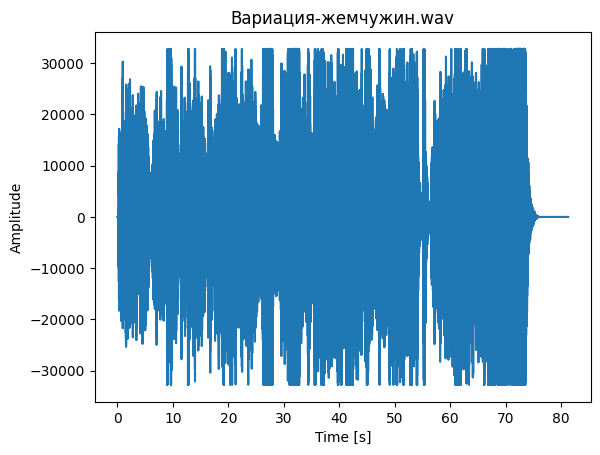

In [6]:
plt.plot(time, canal1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Вариация-жемчужин.wav')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/user-prog/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_9016/1839097480.py", line 8, in <module>
    plt.plot(xf, np.abs(yf))
  File "/home/user-prog/.local/lib/python3.11/site-packages/matplotlib/pyplot.py", line 3578, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/user-prog/.local/lib/python3.11/site-packages/matplotlib/axes/_axes.py", line 1721, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user-prog/.local/lib/python3.11/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/home/user-prog/.local/lib/python3.11/site-packages/matplotlib/axes/_base.py", line 499, in _plot_args
    raise ValueError(f"x and y m

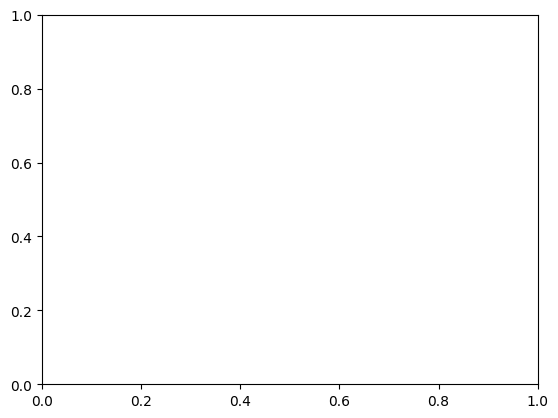

In [10]:
from scipy.fft import  rfft, rfftfreq, irfft

N = int(samplerate * duration)

yf = rfft(canal1)
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

Фильтрация Фурье для НЧ фильтров